## Initial Setup

In [97]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *
import numpy

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

In [2]:
bs = 64

In [3]:
path = Path('./FAST_Utrasound_usingFASTAI_attempt2/')

In [4]:
np.random.seed(21) #locks the random seed

## Test 1

In [5]:
# Create databunch with out the transformations of zoom and warp
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(max_zoom=0, max_warp = None), size=224, bs=bs).normalize(imagenet_stats)

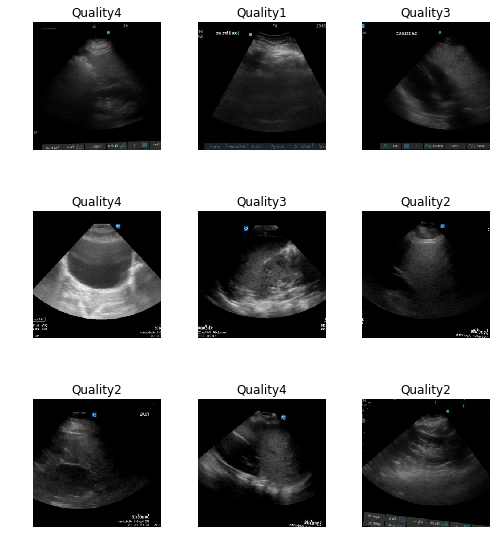

In [6]:
data.show_batch(rows=3, figsize = (7,8))

### Stage 1

In [18]:
# Using resnet34
learn = create_cnn(data, models.resnet34, metrics = error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,error_rate,time
0,1.933071,1.799093,0.782051,00:06
1,1.788028,1.651714,0.641026,00:06
2,1.607546,1.633719,0.641026,00:06
3,1.450727,1.688409,0.662393,00:06
4,1.318192,1.682984,0.636752,00:06
5,1.238557,1.680439,0.666667,00:06
6,1.165613,1.555895,0.645299,00:06
7,1.100233,1.572556,0.683761,00:07
8,1.031950,1.586490,0.670940,00:06
9,0.989259,1.608503,0.649573,00:06


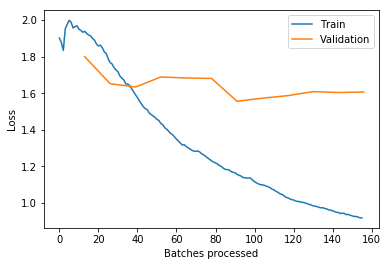

In [19]:
learn.fit_one_cycle(12)
learn.recorder.plot_losses()


In [20]:
learn.unfreeze()

In [22]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-04


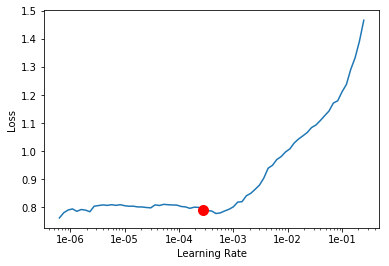

In [24]:
learn.recorder.plot(suggestion = True)

In [25]:
learn.save("Test1-Stage1")

### Stage 2

epoch,train_loss,valid_loss,error_rate,time
0,0.787213,1.689959,0.658120,00:07
1,0.766327,1.931248,0.653846,00:07
2,0.715484,1.960504,0.670940,00:07
3,0.650520,1.830118,0.662393,00:07
4,0.583113,1.842678,0.619658,00:07


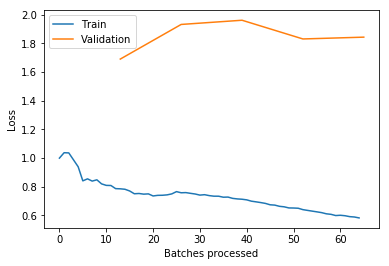

In [28]:
learn.fit_one_cycle(5, max_lr=2.75e-04)
learn.recorder.plot_losses()


epoch,train_loss,valid_loss,error_rate,time
0,0.391228,1.905424,0.611111,00:07
1,0.361496,2.107979,0.619658,00:07
2,0.325521,2.549674,0.623932,00:07
3,0.322075,2.490740,0.598291,00:07
4,0.385120,2.994837,0.752137,00:07
5,0.466204,2.339055,0.615385,00:07
6,0.490049,2.483245,0.632479,00:07
7,0.466247,2.585512,0.666667,00:07
8,0.462438,2.356115,0.645299,00:07
9,0.430889,2.771396,0.632479,00:07


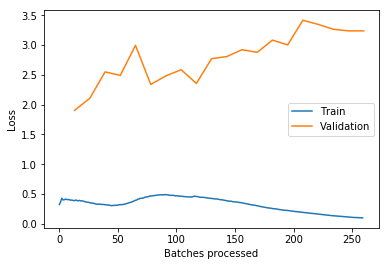

In [29]:
learn.fit_one_cycle(20)
learn.recorder.plot_losses()

In [37]:
learn.save('Test1-Stage2')

## Test 2

### Stage 1

In [33]:
# Using Resnet 34
# Setting pretrained to False
learn2 = cnn_learner(data, models.resnet34, metrics = error_rate, pretrained = False)

epoch,train_loss,valid_loss,error_rate,time
0,1.920444,1.682500,0.833333,00:07
1,1.845824,1.748683,0.743590,00:07
2,1.755409,2.093383,0.743590,00:07
3,1.679267,1.524357,0.756410,00:07
4,1.602634,1.542217,0.658120,00:07
5,1.536582,1.533304,0.739316,00:07
6,1.490021,1.542324,0.683761,00:07
7,1.444737,1.475857,0.696581,00:07
8,1.395411,1.469674,0.709402,00:07
9,1.355592,1.426028,0.688034,00:07


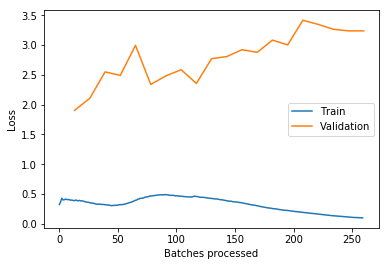

In [35]:
learn2.fit_one_cycle(12)

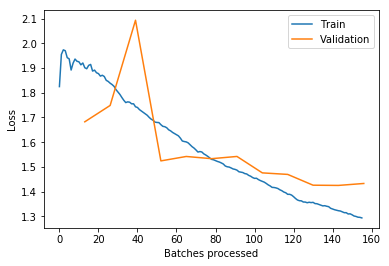

In [36]:
learn2.recorder.plot_losses()

In [38]:
learn2.save("Test2-Stage1")

### Stage 2

In [40]:
learn2.unfreeze()

In [41]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


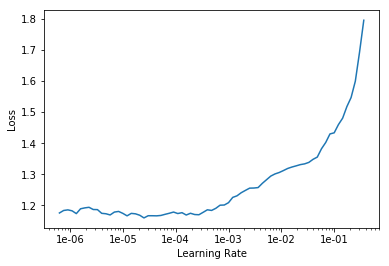

In [42]:
learn2.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,1.168156,1.441977,0.658120,00:07
1,1.178039,1.437112,0.653846,00:07
2,1.176175,1.438963,0.658120,00:07
3,1.192024,1.439485,0.670940,00:07
4,1.173281,1.441018,0.649573,00:07
5,1.179289,1.443978,0.653846,00:07
6,1.169721,1.447142,0.653846,00:07
7,1.170249,1.447015,0.670940,00:07
8,1.171856,1.447422,0.658120,00:07
9,1.176687,1.447654,0.658120,00:07


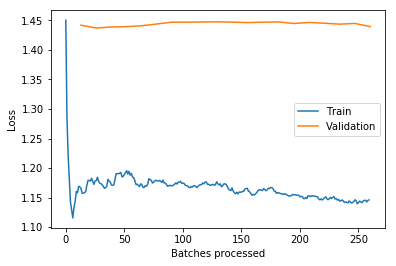

In [43]:
learn2.fit_one_cycle(20, max_lr=slice(2e-06, 6e-06))
learn2.recorder.plot_losses()

In [44]:
learn2.save("Test2-Stage2")

In [45]:
### Stage 3

epoch,train_loss,valid_loss,error_rate,time
0,1.149032,1.428228,0.662393,00:07
1,1.142003,1.487854,0.585470,00:07
2,1.169932,1.721366,0.683761,00:07
3,1.183620,2.041260,0.739316,00:07
4,1.181906,3.613547,0.803419,00:07
5,1.209978,1.608309,0.658120,00:07
6,1.202496,1.548827,0.658120,00:07
7,1.175749,1.804257,0.700855,00:07
8,1.146514,1.933971,0.688034,00:07
9,1.115945,1.761618,0.675214,00:07


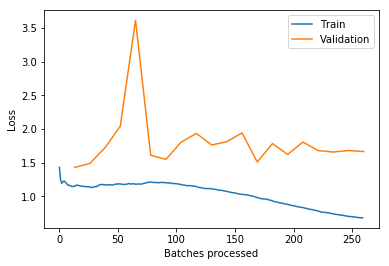

In [46]:
learn2.fit_one_cycle(20)
learn2.recorder.plot_losses()

## Test 3

### Stage 1

In [51]:
#Using Resnet50
#Pretained = True
learn3 = cnn_learner(data, models.resnet50, metrics = error_rate)

epoch,train_loss,valid_loss,error_rate,time
0,1.861162,1.778891,0.700855,00:08
1,1.579616,2.074975,0.662393,00:08
2,1.411032,1.816005,0.649573,00:08
3,1.282066,1.856163,0.645299,00:08
4,1.169285,1.805382,0.675214,00:08
5,1.089462,1.795754,0.670940,00:08


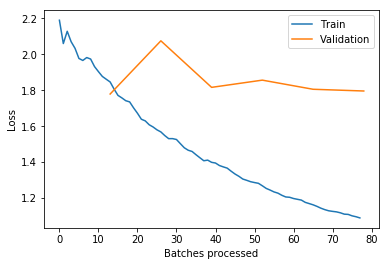

In [52]:
learn3.fit_one_cycle(6)
learn3.recorder.plot_losses()

In [53]:
learn3.save("Test3-Stage1")

### Stage 2

In [54]:
learn3.unfreeze()

epoch,train_loss,valid_loss,error_rate,time
0,0.949593,1.864752,0.615385,00:10
1,0.943731,3.109645,0.713675,00:09
2,0.928520,2.566179,0.666667,00:09
3,0.869332,1.918410,0.585470,00:10
4,0.768722,1.945538,0.606838,00:10
5,0.665149,1.844476,0.598291,00:10


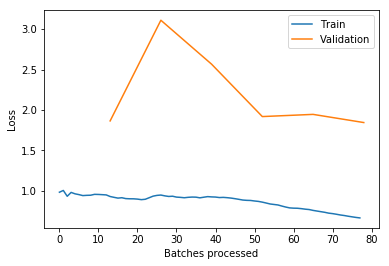

In [55]:
learn3.fit_one_cycle(6)
learn3.recorder.plot_losses()

In [56]:
learn3.save("Test3-Stage2")

### Stage 3

In [100]:
learn3.load("Test3-Stage3")
learn3.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


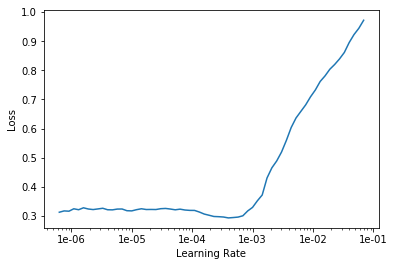

In [101]:
learn3.recorder.plot()

In [102]:
learn3.fit_one_cycle(10, max_lr=slice(1e-05, 6e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.326388,1.839324,0.598291,00:10
1,0.299264,1.871292,0.594017,00:09
2,0.308913,1.950475,0.602564,00:09
3,0.286338,1.925768,0.606838,00:10
4,0.267013,2.039177,0.628205,00:10
5,0.242732,2.152268,0.628205,00:09
6,0.228694,2.160192,0.615385,00:09
7,0.206533,2.151131,0.623932,00:09
8,0.196009,2.158034,0.615385,00:09
9,0.186911,2.145097,0.619658,00:10


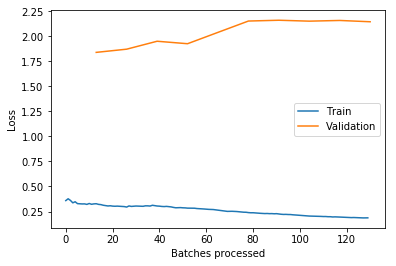

In [103]:
learn3.recorder.plot_losses()

In [104]:
learn3.save("Test3-Stage3")

## Test 4

### Stage 1

In [88]:
#Using Resnet50
#Pretrained = False
learn4 = cnn_learner(data, models.resnet50, metrics = error_rate, pretrained = False)

epoch,train_loss,valid_loss,error_rate,time
0,1.973530,1.948325,0.735043,00:09
1,1.881588,2.037864,0.799145,00:10
2,1.797126,2.015335,0.837607,00:09
3,1.734316,1.589453,0.735043,00:09
4,1.656356,1.605085,0.675214,00:09
5,1.616801,1.571611,0.679487,00:10
6,1.567980,1.586864,0.709402,00:10
7,1.525485,1.514272,0.670940,00:09
8,1.498383,1.455496,0.670940,00:09
9,1.464642,1.462596,0.670940,00:10


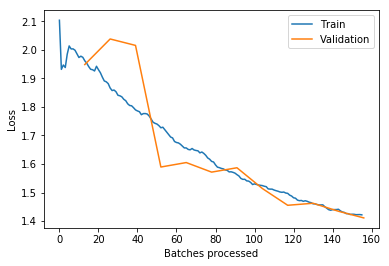

In [89]:
learn4.fit_one_cycle(12)
learn4.recorder.plot_losses()

In [90]:
learn4.save("Test4-Stage1")

### Stage 2

In [91]:
learn4.unfreeze()

In [98]:
learn4.load('Test4-Stage1')
learn4.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


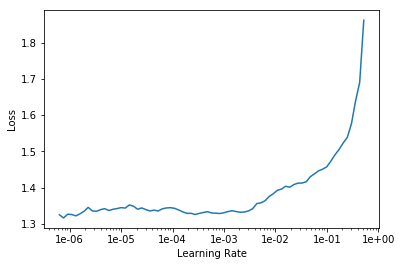

In [99]:
learn4.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,1.345347,1.409672,0.670940,00:10
1,1.366582,1.411391,0.675214,00:09
2,1.361829,1.446807,0.692308,00:10
3,1.359553,1.413717,0.692308,00:10
4,1.338730,1.411762,0.700855,00:09
5,1.333173,1.411873,0.709402,00:09
6,1.326672,1.393505,0.675214,00:10
7,1.321416,1.407547,0.658120,00:09
8,1.314101,1.402984,0.670940,00:09
9,1.303908,1.402138,0.679487,00:09


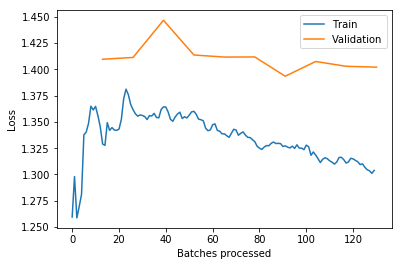

In [105]:
learn4.fit_one_cycle(10, max_lr=slice(2e-05, 5e-05))
learn4.recorder.plot_losses()

In [106]:
learn4.save("Test4-Stage2")

## Test 5

### Stage 1

In [109]:
#Using RESNET50
#Pretrained = True
#wd = .03
learn5 = cnn_learner(data, models.resnet34, metrics = error_rate, wd = .03)


epoch,train_loss,valid_loss,error_rate,time
0,1.990133,1.772378,0.769231,00:06
1,1.804220,1.695359,0.692308,00:06
2,1.630140,1.786590,0.688034,00:06
3,1.490696,1.831083,0.722222,00:06
4,1.346230,1.816297,0.688034,00:06
5,1.256858,1.864985,0.726496,00:06
6,1.190235,1.818666,0.722222,00:06
7,1.110292,1.738729,0.700855,00:06
8,1.049873,1.772165,0.705128,00:06
9,0.991789,1.797542,0.709402,00:06


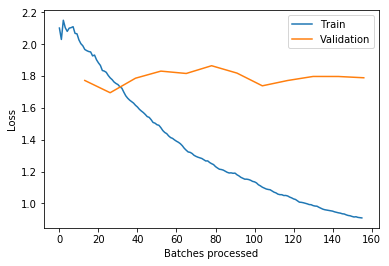

In [110]:
learn5.fit_one_cycle(12)
learn5.recorder.plot_losses()

In [111]:
learn5.save("Test5-Stage1")

### Stage 2

In [114]:
learn5.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


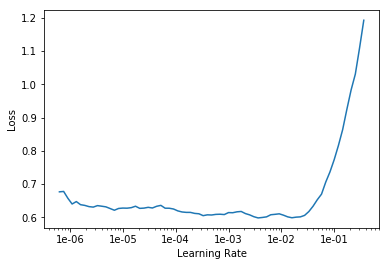

In [116]:
learn5.recorder.plot()

## Test 6

### Stage 1

In [120]:
#Using RESNET50
#Pretrained = True
#wd = .1
learn6 = cnn_learner(data, models.resnet34, metrics = error_rate, wd = .1)

epoch,train_loss,valid_loss,error_rate,time
0,1.963950,1.789083,0.747863,00:06
1,1.756860,1.802361,0.662393,00:06
2,1.591097,1.661945,0.645299,00:06
3,1.456371,1.696829,0.649573,00:06
4,1.339729,1.719166,0.645299,00:06
5,1.257869,1.733353,0.679487,00:06
6,1.157568,1.661882,0.679487,00:06
7,1.076706,1.726629,0.705128,00:06
8,1.018420,1.702607,0.675214,00:06
9,0.972318,1.711724,0.683761,00:06


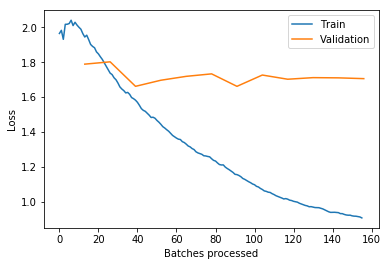

In [121]:
learn6.fit_one_cycle(12)
learn6.recorder.plot_losses()

In [124]:
learn6.save('Test6-Stage1')

## Test 7

### Stage 1

In [126]:
#Using RESNET50
#Pretrained = True
#wd = 1
learn7 = cnn_learner(data, models.resnet34, metrics = error_rate, wd = 1)

epoch,train_loss,valid_loss,error_rate,time
0,2.022619,1.691234,0.769231,00:06
1,1.805533,1.696207,0.670940,00:06
2,1.617779,1.690618,0.666667,00:06
3,1.463462,1.688107,0.670940,00:06
4,1.333869,1.636893,0.679487,00:06
5,1.238564,1.607044,0.696581,00:06
6,1.152223,1.567793,0.726496,00:06
7,1.078729,1.560000,0.679487,00:06
8,1.015575,1.588078,0.688034,00:06
9,0.971348,1.583481,0.696581,00:06


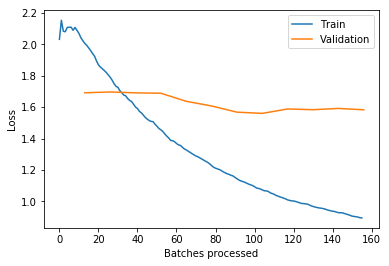

In [127]:
learn7.fit_one_cycle(12)
learn7.recorder.plot_losses()

In [128]:
learn7.save("Test7-Stage1")

## Test 8

### Stage 1

In [131]:
#Using RESNET50
#Pretrained = True
#wd = 5
learn8 = cnn_learner(data, models.resnet34, metrics = error_rate, wd = 5)

epoch,train_loss,valid_loss,error_rate,time
0,1.900572,1.735129,0.816239,00:06
1,1.725825,1.618141,0.692308,00:06
2,1.540259,1.516911,0.649573,00:06
3,1.392597,1.448395,0.688034,00:07
4,1.291639,1.435300,0.679487,00:06
5,1.216834,1.411589,0.696581,00:06
6,1.163423,1.412360,0.722222,00:06
7,1.112669,1.408853,0.692308,00:06
8,1.077453,1.421625,0.692308,00:06
9,1.034801,1.418657,0.717949,00:06


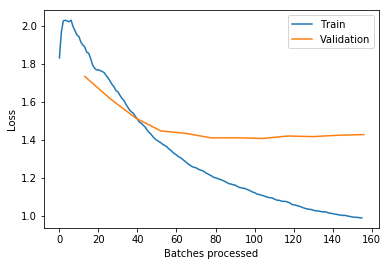

In [132]:
learn8.fit_one_cycle(12)
learn8.recorder.plot_losses()

In [134]:
learn8.save('Test8-Stage1')

## Test 9

### Stage 1

In [137]:
#Using RESNET50
#Pretrained = True
#wd = 15
learn9 = cnn_learner(data, models.resnet34, metrics = error_rate, wd = 15)

epoch,train_loss,valid_loss,error_rate,time
0,1.979392,1.612624,0.739316,00:06
1,1.750222,1.519787,0.688034,00:07
2,1.549117,1.513423,0.688034,00:06
3,1.447716,1.522327,0.662393,00:06
4,1.399516,1.519512,0.649573,00:06
5,1.369869,1.505686,0.679487,00:06
6,1.345443,1.482119,0.658120,00:06
7,1.324284,1.466016,0.641026,00:06
8,1.306744,1.448956,0.653846,00:06
9,1.291958,1.427118,0.658120,00:06


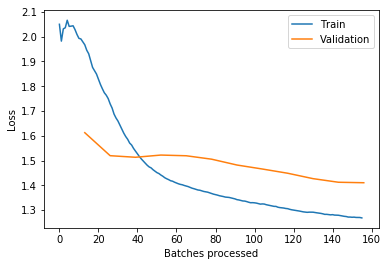

In [138]:
learn9.fit_one_cycle(12)
learn9.recorder.plot_losses()

In [139]:
learn9.save("Test9-Stage1")

### Stage 2

In [141]:
learn9.unfreeze()

In [142]:
learn9.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


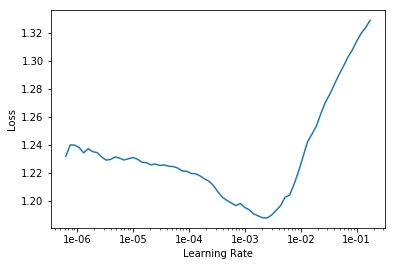

In [143]:
learn9.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,1.234103,1.389535,0.662393,00:07
1,1.223056,1.343924,0.632479,00:07
2,1.193917,1.322991,0.602564,00:07
3,1.151751,1.329876,0.619658,00:07
4,1.103227,1.300896,0.611111,00:07
5,1.054159,1.318656,0.606838,00:07
6,1.003631,1.338382,0.581197,00:07
7,0.954504,1.332801,0.628205,00:07
8,0.909996,1.353635,0.606838,00:07
9,0.872145,1.359451,0.598291,00:07


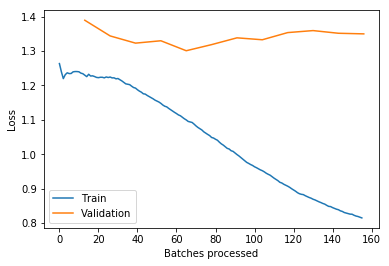

In [144]:
learn9.fit_one_cycle(12, max_lr=slice(1e-05,6e-04))
learn9.recorder.plot_losses()

In [145]:
learn9.save("Test-Stage2")

## Test 10

### Stage 1

In [7]:
#Using RESNET34
#Pretrained = True
#wd = 30
learn10 = cnn_learner(data, models.resnet34, metrics = error_rate, wd = 30)

In [8]:
cnn_learner?

epoch,train_loss,valid_loss,error_rate,time
0,1.943290,1.792140,0.858974,00:08
1,1.752355,1.627620,0.756410,00:06
2,1.594643,1.541195,0.683761,00:07
3,1.500412,1.554381,0.675214,00:07
4,1.476782,1.579773,0.683761,00:06
5,1.483994,1.588804,0.705128,00:06
6,1.499230,1.586786,0.705128,00:06
7,1.510734,1.580663,0.705128,00:07
8,1.517589,1.570981,0.679487,00:06
9,1.521396,1.563085,0.700855,00:06


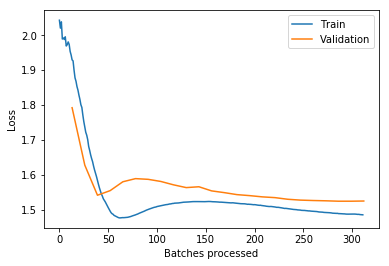

In [9]:
learn10.fit_one_cycle(24)
learn10.recorder.plot_losses()

In [10]:
learn10.save("Test10-Stage1")

### Stage 2

In [11]:
learn10.unfreeze()

In [12]:
learn10.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


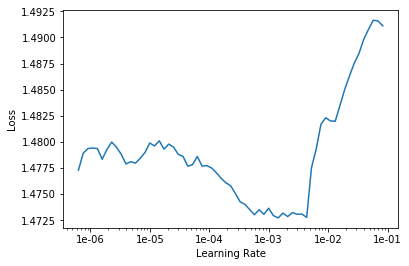

In [13]:
learn10.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,1.479381,1.519172,0.653846,00:07
1,1.477929,1.512006,0.632479,00:07
2,1.472906,1.497143,0.606838,00:07
3,1.459921,1.457203,0.619658,00:07
4,1.435282,1.439087,0.594017,00:07
5,1.404107,1.442391,0.606838,00:07
6,1.368291,1.428758,0.615385,00:07
7,1.334668,1.417454,0.589744,00:07
8,1.305468,1.428222,0.585470,00:07
9,1.280634,1.422999,0.589744,00:07


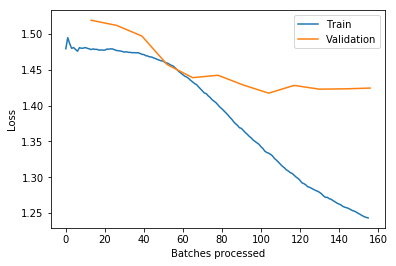

In [14]:
learn10.fit_one_cycle(12, max_lr=slice(1e-05,5e-04))
learn10.recorder.plot_losses()

In [15]:
learn10.save("learn10-Stage2")

In [29]:
#preds = learn10.get_preds(ds_type=DatasetType.Valid)
preds = learn10.predict()

TypeError: predict() missing 1 required positional argument: 'item'

In [92]:
Valid_DF = pd.DataFrame([], columns = ['calc_pred', 'max_pred', 'actual']).reset_index()
Valid_DF.head()

,index,calc_pred,max_pred,actual


In [93]:
#tensorstuff = preds[0][1].tolist()
#print (tensorstuff)
#index_min = np.argmax(tensorstuff)
#print (index_min)

In [102]:
i = 0
for x,y in zip(preds[0], preds[1]):
    b = x.tolist()
    print(b)
    print (float(y))
    calcpredic = (1*b[0]) + (2*b[1]) + (3*b[2]) + (4*b[3]) + (5*b[4])
    maxpred = (np.argmax(b) + 1)
    print (calcpredic, maxpred)    
    dfnew = pd.DataFrame({'calc_pred': calcpredic, 'max_pred': maxpred, 'actual': (float(y)+1)}, index = [i])
    Valid_DF = Valid_DF.append(dfnew, ignore_index=False)
    i = i+1
Valid_DF.head()

[0.3032190501689911, 0.21481527388095856, 0.1321699470281601, 0.16056090593338013, 0.1892348974943161]
0.0
0.5435555100440979 1
[0.2629845142364502, 0.17780321836471558, 0.15233272314071655, 0.1915268450975418, 0.21535271406173706]
0.0
0.5836920142173767 1
[0.30112171173095703, 0.1926420032978058, 0.1321316808462143, 0.16976146399974823, 0.20434308052062988]
0.0
0.5567124038934708 1
[0.11885850876569748, 0.4059441387653351, 0.25823312997817993, 0.13187789916992188, 0.08508637547492981]
0.0
0.5316779300570488 2
[0.12730319797992706, 0.39884424209594727, 0.24991890788078308, 0.13438181579113007, 0.08955178409814835]
0.0
0.5320069178938865 2
[0.2876066565513611, 0.22106420993804932, 0.1411467045545578, 0.16365936398506165, 0.18652315437793732]
0.0
0.5480856835842133 1
[0.15586112439632416, 0.3386380672454834, 0.23437049984931946, 0.1553512066602707, 0.11577912420034409]
0.0
0.5473098412156105 2
[0.14043304324150085, 0.38374629616737366, 0.23892958462238312, 0.1395740956068039, 0.097316987

[0.1125982254743576, 0.2802862524986267, 0.30071187019348145, 0.18644092977046967, 0.11996281147003174]
1.0
0.5841768234968185 3
[0.12627099454402924, 0.3788582682609558, 0.2579142153263092, 0.1422930210828781, 0.09466352313756943]
1.0
0.5400439754128457 2
[0.1452241986989975, 0.4110742211341858, 0.22465795278549194, 0.1282500922679901, 0.09079356491565704]
1.0
0.5216629385948182 2
[0.14157088100910187, 0.4106499254703522, 0.2288353592157364, 0.1288144588470459, 0.09012935310602188]
1.0
0.5230562821030617 2
[0.13378873467445374, 0.4140419661998749, 0.23661957681179047, 0.12830835580825806, 0.0872412919998169]
1.0
0.5242342561483383 2
[0.14227434992790222, 0.42458847165107727, 0.22307991981506348, 0.1234579011797905, 0.08659933507442474]
1.0
0.5175038665533066 2
[0.10949587821960449, 0.3495093286037445, 0.2901531159877777, 0.1537061631679535, 0.09713549166917801]
1.0
0.5558951988816261 2
[0.12422847002744675, 0.40311887860298157, 0.25229963660240173, 0.13276073336601257, 0.0875922143459

[0.09935975074768066, 0.2770158052444458, 0.3231979012489319, 0.18576081097126007, 0.1146656721830368]
2.0
0.5878713339567184 3
[0.12609349191188812, 0.23566827178001404, 0.2839435935020447, 0.20935393869876862, 0.14494064450263977]
2.0
0.6022759586572647 3
[0.13293123245239258, 0.2117726355791092, 0.2734646201133728, 0.22277356684207916, 0.15905798971652985]
2.0
0.612650915980339 3
[0.14352241158485413, 0.31594234704971313, 0.2524963915348053, 0.16815052926540375, 0.11988833546638489]
2.0
0.5609880149364471 2
[0.17515425384044647, 0.2640778124332428, 0.22546769678592682, 0.18473617732524872, 0.1505640745162964]
2.0
0.5742956101894379 2
[0.1425561159849167, 0.3630455732345581, 0.24264897406101227, 0.14762553572654724, 0.10412389039993286]
2.0
0.5415431559085846 2
[0.17288728058338165, 0.28671586513519287, 0.22562503814697266, 0.17480814456939697, 0.13996370136737823]
2.0
0.5644490420818329 2
[0.1616552621126175, 0.2085280865430832, 0.23921702802181244, 0.2160731703042984, 0.17452651262

4.0
0.5712408035993576 2
[0.17337357997894287, 0.19428302347660065, 0.22560086846351624, 0.21869614720344543, 0.18804633617401123]
4.0
0.6107517004013061 3
[0.19269266724586487, 0.16747616231441498, 0.20203684270381927, 0.22593049705028534, 0.21186384558677673]
4.0
0.6193593472242356 4
[0.18340466916561127, 0.1627224087715149, 0.20903967320919037, 0.23285526037216187, 0.211978018283844]
4.0
0.6254559278488159 4
[0.19039610028266907, 0.15357543528079987, 0.19996130466461182, 0.23493173718452454, 0.22113537788391113]
4.0
0.6285669445991516 4
[0.17991942167282104, 0.161235511302948, 0.21147692203521729, 0.23639124631881714, 0.21097694337368011]
4.0
0.6274541825056076 4
[0.160405695438385, 0.17756789922714233, 0.23516595363616943, 0.23540404438972473, 0.19145642220973969]
4.0
0.6239875286817551 4


,actual,calc_pred,index,max_pred
0,1.0,2.717778,NaN,1
1,1.0,2.918460,NaN,1
2,1.0,2.783562,NaN,1
3,1.0,2.658390,NaN,2
4,1.0,2.660035,NaN,2


In [106]:
Valid_DF.head()


,actual,calc_pred,index,max_pred
0,1.0,2.717778,NaN,1
1,1.0,2.918460,NaN,1
2,1.0,2.783562,NaN,1
3,1.0,2.658390,NaN,2
4,1.0,2.660035,NaN,2


[1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 4, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 3, 2, 3, 2, 4, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 4, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 4, 4, 3, 4, 4, 3, 2, 2, 1, 3, 4, 3, 1, 4, 3, 2, 2, 3, 4, 4, 4, 4, 4, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 

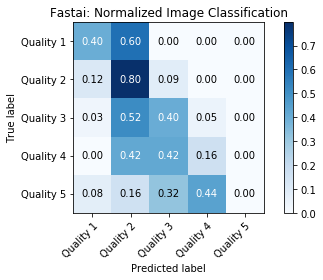

In [107]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
  

CalQual = Valid_DF["max_pred"].values.tolist()
i = 0
for x in CalQual:
  if x<1:
    CalQual[i] = 1
  elif x> 5:
    CalQual[i] = 5
  else:
    CalQual[i] = round(x)
  i = i + 1
  
print(CalQual) 
  
TruQual = Valid_DF['actual'].values.tolist()

a = plot_confusion_matrix(TruQual, CalQual, classes = ['Quality 1', 'Quality 2', 'Quality 3', 'Quality 4', 'Quality 5'], normalize = True, title = 'Fastai: Normalized Image Classification') 
  
plt.savefig("./figures/confusion_matrix_Fastai_ImageClassification.png")

## Test 11

### Stage 1

In [184]:
#Using RESNET50
#Pretrained = True
#wd = 30
learn11 = cnn_learner(data, models.resnet50, metrics = error_rate, wd = 30)

epoch,train_loss,valid_loss,error_rate,time
0,1.822360,1.591566,0.743590,00:08
1,1.641067,1.597948,0.688034,00:08
2,1.480036,1.525699,0.679487,00:08
3,1.401120,1.547561,0.713675,00:09
4,1.397720,1.576799,0.670940,00:08
5,1.421044,1.586818,0.705128,00:08
6,1.446927,1.584742,0.705128,00:08
7,1.465224,1.583604,0.688034,00:08
8,1.475344,1.579409,0.688034,00:08
9,1.480896,1.571586,0.705128,00:08


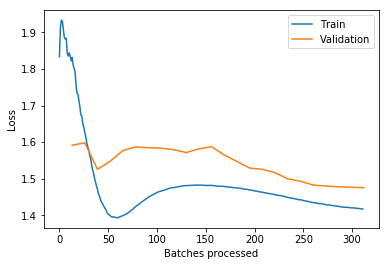

In [185]:
learn11.fit_one_cycle(24)
learn11.recorder.plot_losses()

In [177]:
learn.save("Test11-Stage1")

In [171]:
### Stage 2

In [178]:
learn11.unfreeze()

In [179]:
learn11.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


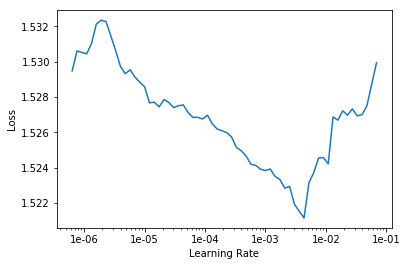

In [180]:
learn11.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,1.528613,1.547836,0.645299,00:07
1,1.525717,1.542034,0.636752,00:07
2,1.522413,1.534742,0.598291,00:07
3,1.516308,1.524482,0.636752,00:07
4,1.498628,1.477664,0.606838,00:07
5,1.472733,1.535144,0.692308,00:07
6,1.448588,1.499214,0.666667,00:07
7,1.420887,1.590722,0.700855,00:07
8,1.394843,1.552672,0.679487,00:07
9,1.370345,1.523914,0.688034,00:07


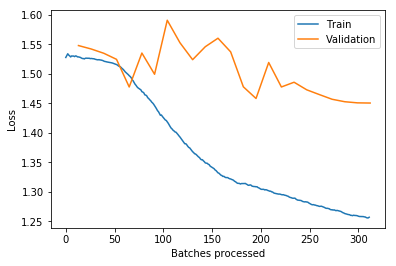

In [181]:
learn11.fit_one_cycle(24, max_lr=slice(1e-04,1e-03))
learn11.recorder.plot_losses()